Points = [(2, 45), (12, 83), (17, 57), (24, 157), (31, 130), (32, 73), (33, 10), (36, 81), (41, 105), (46, 110), (49, 96), (51, 33), (52, 64), (54, 85), (61, 54), (62, 11), (63, 14), (68, 125), (69, 39), (74, 33), (75, 60), (76, 123), (78, 43), (83, 35), (86, 74), (88, 16), (92, 200), (104, 107), (106, 31), (113, 157), (117, 194), (126, 185), (128, 43), (129, 126), (134, 107), (138, 129), (140, 16), (141, 17), (144, 147), (148, 143), (150, 75), (151, 148), (152, 159), (153, 159), (154, 46), (156, 146), (157, 70), (158, 71), (161, 161), (171, 105), (173, 59), (174, 151), (175, 193), (176, 19), (189, 150), (193, 18), (194, 8), (195, 186), (197, 64), (199, 135)]
TREE = [[(33, 10), -1, 1, 4], [(62, 11), -1, -1, 5], [(51, 33), 0, 4, 3], [(2, 45), -1, -1, 5], [(17, 57), 3, 5, 4], [(61, 54), -1, -1, 5], [(63, 14), 2, 10, 2], [(74, 33), -1, -1, 5], [(88, 16), 7, 9, 4], [(106, 31), -1, -1, 5], [(83, 35), 8, 12, 3], [(69, 39), -1, -1, 5], [(75, 60), 11, 13, 4], [(78, 43), -1, -1, 5], [(52, 64), 

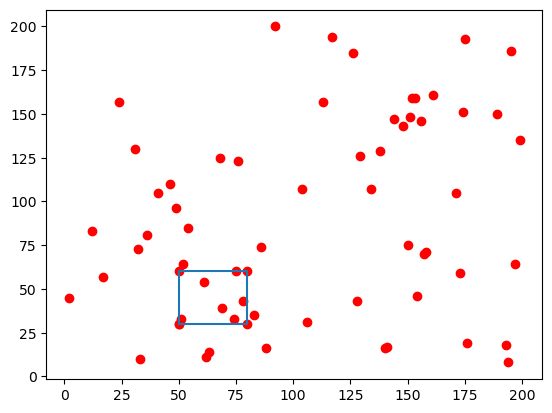

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from scipy.stats import multivariate_normal
import random
import functools
import cmath
import math as ma

def create_spots(many=10,tx=100,ty=100):
    x=[]
    y=[]
    lisx=[]
    lis=[]
    i=0
    count=0
    while i<many:
        x=random.randint(0,tx)
        y=random.randint(0,ty)
        count+=1
        if count==many*50:
            print("give bigger x or smaller points")
            break
        if x not in lisx:
            i+=1
            lis.append((x,y))
            lisx.append(x)   
    return lis






def find_orth(spots,findxy,middle):
    (xmin,ymin,xmax,ymax)=(findxy[0][0],findxy[0][1],findxy[2][0],findxy[2][1])
    tree_list=spots[middle]
    
    if tree_list[1]==-1 and tree_list[2]==-1 and (tree_list[0][0]>=xmin and tree_list[0][0]<=xmax) and (tree_list[0][1]>=ymin and tree_list[0][1]<=ymax):
    #    print(tree_list, 'pass')
       return [tree_list[0]]
    elif tree_list[1]==-1 and tree_list[2]==-1:
        # print(tree_list,'[]')
        return [ ]
    s1=[]
    s2=[]
    s3=[]
    # print(tree_list,'check')
    if tree_list[1]!=-1:
        if tree_list[0][0]>xmin  and tree_list[3]%2==0:
            s1=find_orth(spots,findxy,tree_list[1])
        elif tree_list[0][1]>ymin  and tree_list[3]%2==1:
            s1=find_orth(spots,findxy,tree_list[1])

    if tree_list[2]!=-1:
        if tree_list[0][0]<xmax  and tree_list[3]%2==0:
            s3=find_orth(spots,findxy,tree_list[2])
        elif tree_list[0][1]<ymax  and tree_list[3]%2==1:
            s3=find_orth(spots,findxy,tree_list[2])
    if (tree_list[0][0]>=xmin and tree_list[0][0]<=xmax) and (tree_list[0][1]>=ymin and tree_list[0][1]<=ymax):
        s2=[tree_list[0]]
    

    return s1+s2+s3



def create_kd_tree_part1(spots,h):

    if len(spots)==1:
        return [[[spots[0],spots[0],spots[0],h]],spots[0]] #f=fillo toy dentroy , h =depth , ta alla einai right and left continues
    
    if h%2==0:
        spots.sort(key=lambda x:[x[0],x[1]])
        k=0
    else:
        k=1
        spots.sort(key=lambda x:[x[1],x[0]])
    if len(spots)==3:
        rd=int(len(spots)/2)+1
        s1=spots[0: rd-1]
        tree_list=spots[rd-1]
        s2=spots[rd:]
        treel=create_kd_tree_part1(s1,h+1)
        treer=create_kd_tree_part1(s2,h+1)
        tree_middle=[tree_list,treel[1],treer[1],h]
        tree= treel[0]+[tree_middle] +treer[0]
        return [tree,tree_list]


    if len(spots)==2:
        rd=int(len(spots)/2)
        tree_list=spots[rd-1]
        s2=spots[rd:]
        treer=create_kd_tree_part1(s2,h+1)
        tree_middle=[tree_list,tree_list,treer[1],h]
        tree=[tree_middle] +treer[0]
        return [tree,tree_list]


    if len(spots)%2==0:
        rd=int(len(spots)/2)
    else: 
        rd=int(len(spots)/2)+1

    
    s1=spots[0: rd-1]
    tree_list=spots[rd-1]
    s2=spots[rd:]
    treel=create_kd_tree_part1(s1,h+1)
    treer=create_kd_tree_part1(s2,h+1)
    tree_middle=[tree_list,treel[1],treer[1],h]
    tree= treel[0]+[tree_middle] +treer[0]
    if h==0:
        return tree
    return [tree,tree_list]


def create_kd_tree_part2(spots):
    newspots=spots
      #  print(a,spots.index(a))
    for a in spots:
        if a[1]!=a[0]:
            for b in spots:
                if b[0]==a[1]:
                    newspots[spots.index(a)][1]=spots.index(b)
        if a[0]!=a[2]:
            for b in spots:
                if b[0]==a[2]:
                    newspots[spots.index(a)][2]=spots.index(b)
        if a[1]==a[0]:
            newspots[spots.index(a)][1]=-1
        if a[0]==a[2]:
            newspots[spots.index(a)][2]=-1
    return newspots
        
def print_x_y(lis,hull):
    mx=[]
    my=[]
    lx=[]
    ly=[]
    for (x,y) in hull:
        mx.append(x)
        my.append(y)

    for (x,y) in lis:
        if (x,y)  not in hull:
            lx.append(x)
            ly.append(y)

    (x1,y1)=hull[0]
    mx.append(x1)
    my.append(y1)
    plt.plot(mx,my)
    plt.scatter(lx,ly,color='red')
    plt.scatter(mx,my,color='red')
    plt.show()
       







# L= create_spots(6)
L=[(2, 45), (12, 83), (17, 57), (24, 157), (31, 130), (32, 73), (33, 10), (36, 81), (41, 105), (46, 110), (49, 96), (51, 33), (52, 64), (54, 85),
 (61, 54), (62, 11), (63, 14), (68, 125), (69, 39), (74, 33), (75, 60), (76, 123), (78, 43), (83, 35), (86, 74), (88, 16), (92, 200), (104, 107), 
 (106, 31), (113, 157), (117, 194), (126, 185), (128, 43), (129, 126), (134, 107), (138, 129), (140, 16), (141, 17), 
 (144, 147), (148, 143), (150, 75), (151, 148), (152, 159), (153, 159), (154, 46), (156, 146), 
(157, 70), (158, 71), (161, 161), (171, 105), (173, 59), (174, 151), (175, 193), (176, 19), (189, 150), (193, 18), (194, 8), (195, 186), (197, 64), (199, 135)]


# kato aristera ,pano aristera ,pano dejia ,kato dejia , prepei me ayth thn seira to orthogonia 
B=[(50,30),(50,60),(80,60),(80,30)]




print('Points =',L)
# print(sorted(L,key=lambda x:[x[0],x[1]]))
A=create_kd_tree_part1(L,0)
# taking the tree from point_a->point_b to point_a->array[0] oysiastika apo to onoma kombo sto meros tis stibas
A=create_kd_tree_part2(A)
print('TREE =',A)
print('point example =>  point=',A[0][0],'  left next point=',A[0][1],' right next point=',A[0][2],' h=',A[0][3],'the point all=',A[0])
print('if next = -1 that is that cannot continue that way ,if left and right both =-1 its a leaf (end of tree)')

#begin of tree
if len(A)%2==0:
    rd=int(len(A)/2)
else: 
    rd=int(len(A)/2)+1

A1=find_orth(A,B,rd-1)

print('POINTS OF ORTHOGONIO = ',A1)
print_x_y(L,B)
# (51, 33), (61, 54),  (69, 39), (74, 33), (75, 60),  (78, 43)






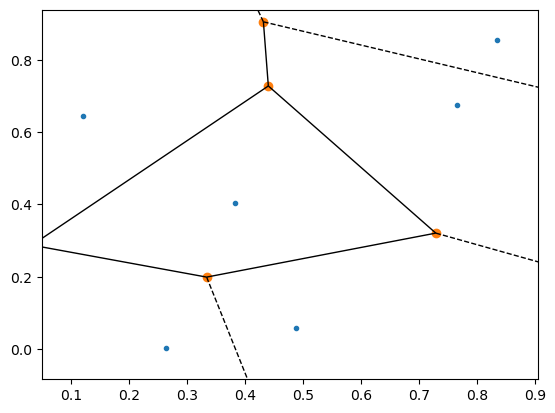

C:\Users\Aggelos Kontos\AppData\Local\Temp\ipykernel_9628\2096729855.py:83: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  segments = voronoi(points)


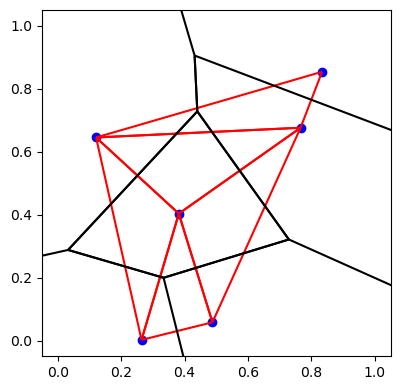

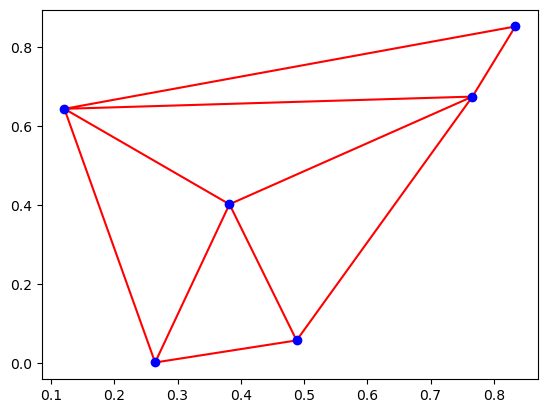

In [2]:
#!/usr/bin/env python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import Voronoi, voronoi_plot_2d 


def voronoi(P):
    delauny = Delaunay(P)
    triangles = delauny.points[delauny.vertices]

    lines = []

    # Triangle vertices
    A = triangles[:, 0]
    B = triangles[:, 1]
    C = triangles[:, 2]
    lines.extend(zip(A, B))
    lines.extend(zip(B, C))
    lines.extend(zip(C, A))
    lines = matplotlib.collections.LineCollection(lines, color='r')
    plt.gca().add_collection(lines)

    circum_centers = np.array([triangle_csc(tri) for tri in triangles])

    segments = []
    for i, triangle in enumerate(triangles):
        circum_center = circum_centers[i]
        for j, neighbor in enumerate(delauny.neighbors[i]):
            if neighbor != -1:
                segments.append((circum_center, circum_centers[neighbor]))
            else:
                ps = triangle[(j+1)%3] - triangle[(j-1)%3]
                ps = np.array((ps[1], -ps[0]))

                middle = (triangle[(j+1)%3] + triangle[(j-1)%3]) * 0.5
                di = middle - triangle[j]

                ps /= np.linalg.norm(ps)
                di /= np.linalg.norm(di)

                if np.dot(di, ps) < 0.0:
                    ps *= -1000.0
                else:
                    ps *= 1000.0
                segments.append((circum_center, circum_center + ps))
    return segments



def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)


# points = np.random.random((6,2))
points=[[0.83381456 , 0.85316567],[0.38200659 ,0.40277658], [0.488104 ,  0.05788699],[0.76608118, 0.67552392],[0.12105975, 0.64458283],[0.26445455, 0.00195864]]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)

plt.show()

X,Y = [],[]

for a in points:
    X.append(a[0])
    Y.append(a[1])


fig = plt.figure(figsize=(4.5,4.5))
axes = plt.subplot(1,1,1)



segments = voronoi(points)
lines = matplotlib.collections.LineCollection(segments, color='k')
axes.add_collection(lines)
plt.scatter(X, Y,color='blue')
# plt.axis([-0.05,1.05,-0.05,1.05])
plt.axis([-0.05,1.05,-0.05,1.05])
plt.show()



tri = Delaunay(points)
plt.triplot(X, Y, tri.simplices,color='red')

plt.plot(X,Y, 'o' ,color='blue')

plt.show()


